## Distribuição da Amostra - Estimação de Parâmetros Estatísticos
### média amostral m é a melhor estimativa pontual da média populacional m_p
### Margem de erro 'margem_err' é a dif max possível entre m e m_p com um certo grau de confiança

In [1]:
from scipy.stats import norm
import scipy.stats
from scipy.stats import t as t_student
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

### 1. std da população conhecido
### 2. [Tamanho Amostral](#2tam_amostra)
### 3. [Intervalo de Confiança com base na amostra - std da população não conhecido](#3ic_stdN)
### 4. [Intervalo de Confiança para a Proporção p](#4icP)
### 5. [Tamanho da amostra n para o valor planejado de p](#5nP)
-------------------------------

## 1. std da população conhecido

In [3]:
# erro_padrão_Media_amostra (std_p,  N  (populacao),  n= tamanho amostra)
def std_m(std_p,n):                               # n/N < 0.05 ou populacao infinita
    return float(std_p/n**0.5)
def std_m_N(std_p,n,N):   
    return float((N-n)/(N-1)*std_p/n**0.5)
rv= scipy.stats.norm(0,1)

In [4]:
# erro_padrão_m (n,N,std_p)
std_p= 1.5            # inserir std da populacao
n= 20                # inserir tamanho da amostra
e_m= std_m(std_p,n)    # n/N < 0.05
e_m                          # erro padrão da média da amostra

0.33541019662496846

In [48]:
# Probabilidade no intervalo em torno da m_p (m_p, e_m)
m_p= 22.9            # a média das amostras tende para a média da população
#e_m= 20
x1= m_p - 6                            # inserir limites do intervalo
x2= m_p + 6                              # inserir limites do intervalo
#x1=m_p
#x2=100000
z1= (x1 - m_p) / e_m
z2= (x2 - m_p) / e_m
rv= scipy.stats.norm(0,1)
pcdf1= rv.cdf(z1)
pcdf2= rv.cdf(z2)
pcdf2 - pcdf1

0.999438909560036

In [45]:
# n (std_p e e_m)  
std_p= 500
e_m= 20
n= std_p**2 / e_m**2     # n/N < 0.05 ou populacao infinita
n

625.0

In [5]:
# Margem de erro e Intervalo de Confiança (a_conf, e_m, m_p)     # std_populaçao conhecido
# e_m= 0.57                 # com base em (n, std_p)
m_p= 22.9                    # média amostral é a melhor estimativa pontual da média populacional
a_conf= 0.9                # inserir nível de confiança
a= (1-a_conf)/2
rv= scipy.stats.norm(0,1)
margem_err= abs(rv.ppf(a)*e_m)                            #inverse cdf
intervalo_confianca= (m_p-margem_err, m_p+margem_err)
d= {'Tam. Amostra':[n],'std_p':[std_p],'Nivel de Confiança':a_conf,'Media População':m_p,'Margem de erro':[margem_err],
    'Intervalo de Confiança':[intervalo_confianca]}
pd.DataFrame(d)

,Tam. Amostra,std_p,Nivel de Confiança,Media População,Margem de erro,Intervalo de Confiança
0,20,1.5,0.9,22.9,0.551701,"(22.348299321564912, 23.451700678435085)"


In [6]:
# intervalo de confiança (a_conf, m_p, e_m)
x99= norm.interval(a_conf,m_p,e_m)             # calcula limites do intervalo com base no nivel de confiança
(x99[0],x99[1])

(22.348299321564912, 23.451700678435085)

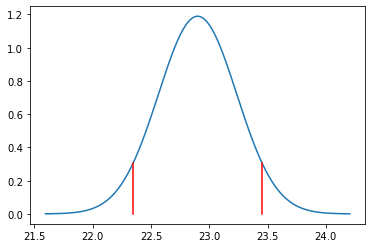

In [13]:
# Distribuição Normal do erro da média amostral
#m_p= 22.9            # a média das amostras tende para a média da população
rv= scipy.stats.norm(m_p,e_m)
x99= norm.interval(0.9999,m_p,e_m)             # calcula limites do intervalo com 99% de confiança
x= np.linspace(x99[0],x99[1],5000)       # gera um intervalo no eixo x
plt.plot(x, rv.pdf(x))
plt.plot([m_p-margem_err, m_p-margem_err], [0, rv.pdf(m_p-margem_err)], color= 'red')
plt.plot([m_p+margem_err, m_p+margem_err], [0, rv.pdf(m_p+margem_err)], color= 'red')
plt.show()

<a id='2tam_amostra'></a>
## Tamanho Amostral
- estudos anteriores: estimativa do std_p
- estudo-piloto com amostra preliminar: std da amostra pode ser usado como valor planejado de std_p
- Amplitude / 4 = aproximação grosseira do std_p  (dif entre maiores e menores valores de dados da população)

In [2]:
# Tam n da amostra(std, margem de erro, nivel de confiança)   quando n/N < 0.05 ou populacao infinita
a_conf= 0.97
margem_err= 0.5
std_p= 2.0743 #  0.1764 ** 0.5
a= (1-a_conf)/2
rv= scipy.stats.norm(0,1)
z= abs(rv.ppf(a))                         #inverse cdf
n= (z * std_p / margem_err) **2
n= math.ceil(n)
d= {'Nivel de Confiança':[a_conf], 'std':[std_p], 'Margem de erro':[margem_err], 'Tamanho Estimado da amostra':[n]}
pd.DataFrame(d)

,Nivel de Confiança,std,Margem de erro,Tamanho Estimado da amostra
0,0.97,2.0743,0.5,82


In [34]:
# Tam n da amostra(std, margem de erro, nivel de confiança, N=tam Popul)  quando n/N > 0.05
a_conf= 0.92
margem_err= 50
std_p= 400
N= 386
a= (1-a_conf)/2
rv= scipy.stats.norm(0,1)
z= abs(rv.ppf(a))
n= N * std_p**2 * z**2 / ( (N-1) * margem_err**2 + std_p**2 * z**2 )
#n= (z * std_p / margem_err) **2
n= math.ceil(n)
d= {'Nivel de Confiança':[a_conf],'Tam. População':[N], 'std':[std_p], 'Margem de erro':[margem_err], 
    'Tamanho Estimado da amostra':[n]}
pd.DataFrame(d)

,Nivel de Confiança,Tam. População,std,Margem de erro,Tamanho Estimado da amostra
0,0.92,386,400,50,131


<a id='3ic_stdN'></a>
## Intervalo de Confiança com base na amostra - std da população não conhecido

In [18]:
# intervalo de confiança (n,p_conf, m, std)             # media e std da amostra com dist normal
n= 16
a_conf= 0.98
m= 330                   # média e std da amostra
std= 40
a= (1-a_conf)/2
rv= t_student(n-1)
t_alfa= rv.isf(a)
margem_err= abs(rv.ppf(a) * std / n**0.5)
intervalo_confianca= (m-margem_err, m+margem_err)
#intervalo_confianca
d= {'Nivel de Confiança':a_conf, 't_alfa/2':[t_alfa],'Media':m,'Margem de erro':[margem_err],'Intervalo de Confiança':[intervalo_confianca]}
pd.DataFrame(d)

,Nivel de Confiança,t_alfa/2,Media,Margem de erro,Intervalo de Confiança
0,0.98,2.60248,330,26.024803,"(303.9751970500451, 356.0248029499549)"


In [46]:
136/400

0.34

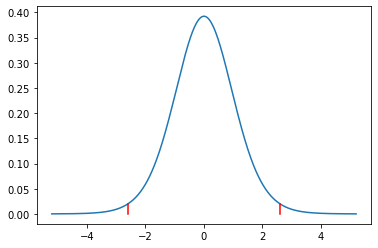

In [19]:
x= np.linspace(-2*t_alfa,2*t_alfa,3000)       # gera um intervalo no eixo x
plt.plot(x, rv.pdf(x))
plt.plot([-t_alfa, -t_alfa], [0, rv.pdf(-t_alfa)], color= 'red')
plt.plot([t_alfa, t_alfa], [0, rv.pdf(t_alfa)], color= 'red')
plt.show()

<a id='4icP'></a>
## Intervalo de Confiança para a Proporção <i>p

In [20]:
# erro_padrão_proporção_amostra (p, n, N)        # np >=5 e  n(1-p) >= 5
def err_p(n,p):                                  # n/N < 0.05 ou populacao infinita
    return float( (p*(1-p)/n)**0.5 )
def err_p_N(n,p,N):
    return float( ( ((N-n)/(N-1))**0.5 ) * ((p*(1-p)/n)**0.5) )
rv= scipy.stats.norm(0,1)

In [21]:
# erro_padrão_p_amostra (n,p_população, N)         # np >=5 e  n(1-p) >= 5
n= 125
p= 7/n
erro_p= err_p(n,p)               # n/N < 0.05 ou populacao infinita
d= {'p':[p], 'Erro padrão p':erro_p}
pd.DataFrame(d)

,p,Erro padrão p
0,0.056,0.020565


In [18]:
# Probabilidade Proporção p no intervalo em torno da p_med_pop (n,p)
#n= 30            
#p= 0.6               # a média da proporção das amostras tende para a média da proporção da população
#erro_p= err_p(n,p)
#x1= p - 0.04                            # inserir limites do intervalo
#x2= p + 0.04                            # inserir limites do intervalo
x1= 0.3
x2= 0.8
z1= (x1 - p) / erro_p
z2= (x2 - p) / erro_p
rv= scipy.stats.norm(0,1)
pcdf1= rv.cdf(z1)
pcdf2= rv.cdf(z2)
pcdf2 - pcdf1

0.21185539858339675

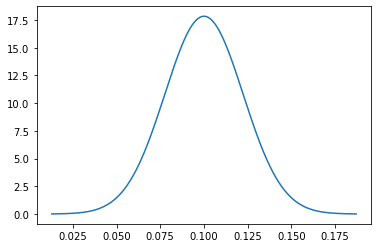

In [10]:
# Distribuição Normal do erro da Proporção amostral
rv= scipy.stats.norm(p,erro_p)
x99= norm.interval(0.9999,p,erro_p)             # calcula limites do intervalo com 99% de confiança
x= np.linspace(x99[0],x99[1],5000)       # gera um intervalo no eixo x
plt.plot(x, rv.pdf(x))

In [22]:
# margem de erro e Intervalo de Confiança (n, p, nivel_confiança)      # da amostra com np>=5 e n(1-p)>=5
#n= 800
#p= 0.7
a_conf= 0.87                # inserir nível de confiança
# rodar a celula
rv= scipy.stats.norm(0,1)
a= (1-a_conf)/2
z = abs(rv.ppf(a))                            #inverse cdf
margem_err= z * ( ( p*(1-p)/n )**0.5 )
intervalo_confianca= (p-margem_err, p+margem_err)
d= {'n':[n], 'p':[p],'n.p':[n*p],'n.(1-p)':[n*(1-p)], 'nivel de confiança':[a_conf], 
    'Margem de Erro':[margem_err], 'Interv. Conf':[intervalo_confianca]}
pd.DataFrame(d)

,n,p,n.p,n.(1-p),nivel de confiança,Margem de Erro,Interv. Conf
0,125,0.056,7.0,118.0,0.87,0.031137,"(0.024862760653218834, 0.08713723934678116)"


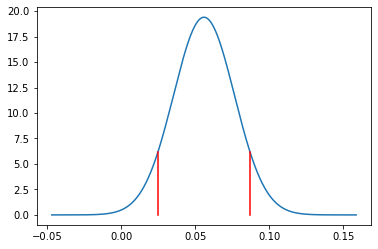

In [25]:
rv= scipy.stats.norm(p,erro_p)
x= np.linspace(p-5*erro_p,p+5*erro_p,3000)       # gera um intervalo no eixo x
plt.plot(x, rv.pdf(x))
plt.plot([p-margem_err, p-margem_err], [0, rv.pdf(p-margem_err)], color= 'red')
plt.plot([p+margem_err, p+margem_err], [0, rv.pdf(p+margem_err)], color= 'red')
plt.show()

<a id='5nP'></a>
## Tamanho da amostra n para o valor planejado de p
- proporção de amostra anterior ou unidades similares
- proporção amostral em estudo-piloto
- palpite
- p= 0.5

In [18]:
# Tamanho da amostra n (p, margem_erro)             # populacao infinita
p= 0.5                 # estimar por 0.5   - valor máximo
margem_err= 0.025
a_conf= 0.9
rv= scipy.stats.norm(0,1)
a= (1-a_conf)/2
z = abs(rv.ppf(a))                            #inverse cdf
n= z**2 * p*(1-p) / margem_err**2
n= math.ceil(n)
d={'p':[p], 'Margem de Erro':[margem_err], 'Nivel de Confiança':[a_conf], 'Tam. Amostra':[n]}
pd.DataFrame(d)

,p,Margem de Erro,Nivel de Confiança,Tam. Amostra
0,0.5,0.025,0.9,1083


In [46]:
# Tamanho da amostra n (N, p, margem_erro)             # populacao finita
p= 0.7                 # estimar por 0.5 - valor máximo
N= 1286
margem_err= 0.04
a_conf= 0.9
rv= scipy.stats.norm(0,1)
a= (1-a_conf)/2
z = abs(rv.ppf(a))                            #inverse cdf
n= N*p*(1-p)* z**2 / ( p*(1-p)* z**2 + (N-1)* margem_err**2)
#n= z**2 * p*(1-p) / margem_err**2
n= math.ceil(n)
d={'p':[p], 'Margem de Erro':[margem_err], 'Nivel de Confiança':[a_conf],'Tam. População':[N], 'Tam. Amostra':[n]}
pd.DataFrame(d)

,p,Margem de Erro,Nivel de Confiança,Tam. População,Tam. Amostra
0,0.7,0.04,0.9,1286,279
